In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
inf = pd.read_csv('day.csv',index_col = 'instant')

In [101]:
inf.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [102]:
inf['weathersit'].value_counts()




# in data dictionary there are 4 levels to this variable,
# in the data given, there are only 3

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [103]:
inf.shape

(730, 15)

In [104]:
inf.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [105]:
numinf = inf[['temp','atemp','hum','windspeed']]     #Numeric Variables

In [106]:
numinf.head()

,temp,atemp,hum,windspeed
instant,,,,
1,14.110847,18.18125,80.5833,10.749882
2,14.902598,17.68695,69.6087,16.652113
3,8.050924,9.47025,43.7273,16.636703
4,8.200000,10.60610,59.0435,10.739832
5,9.305237,11.46350,43.6957,12.522300


In [107]:
catinf = inf[['season','mnth','weekday','weathersit']]
catinf.head()                                      #Categorical Variables

,season,mnth,weekday,weathersit
instant,,,,
1,1,1,1,2
2,1,1,2,2
3,1,1,3,1
4,1,1,4,1
5,1,1,5,1


In [108]:
boolinf = inf[['yr','holiday','workingday']]
#Binary Variables

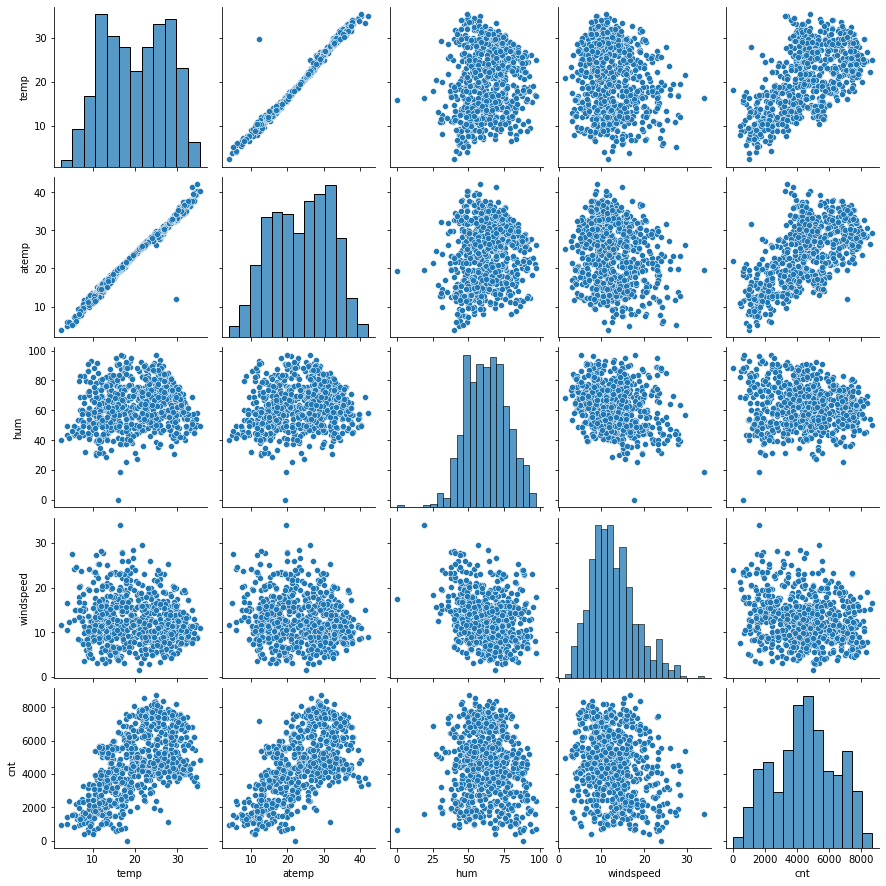

In [109]:
sns.pairplot(inf[['temp','atemp','hum','windspeed','cnt']])
# very high multi-colenearity b/w temp and atemp

#### Observable Trends
 

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

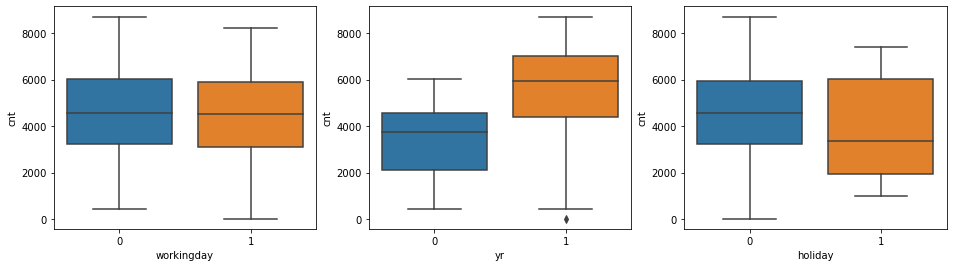

In [110]:
plt.figure(figsize=(16,9))
plt.subplot(2,3,1)
sns.boxplot(x = 'workingday', y = 'cnt', data = inf)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = inf)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = inf)


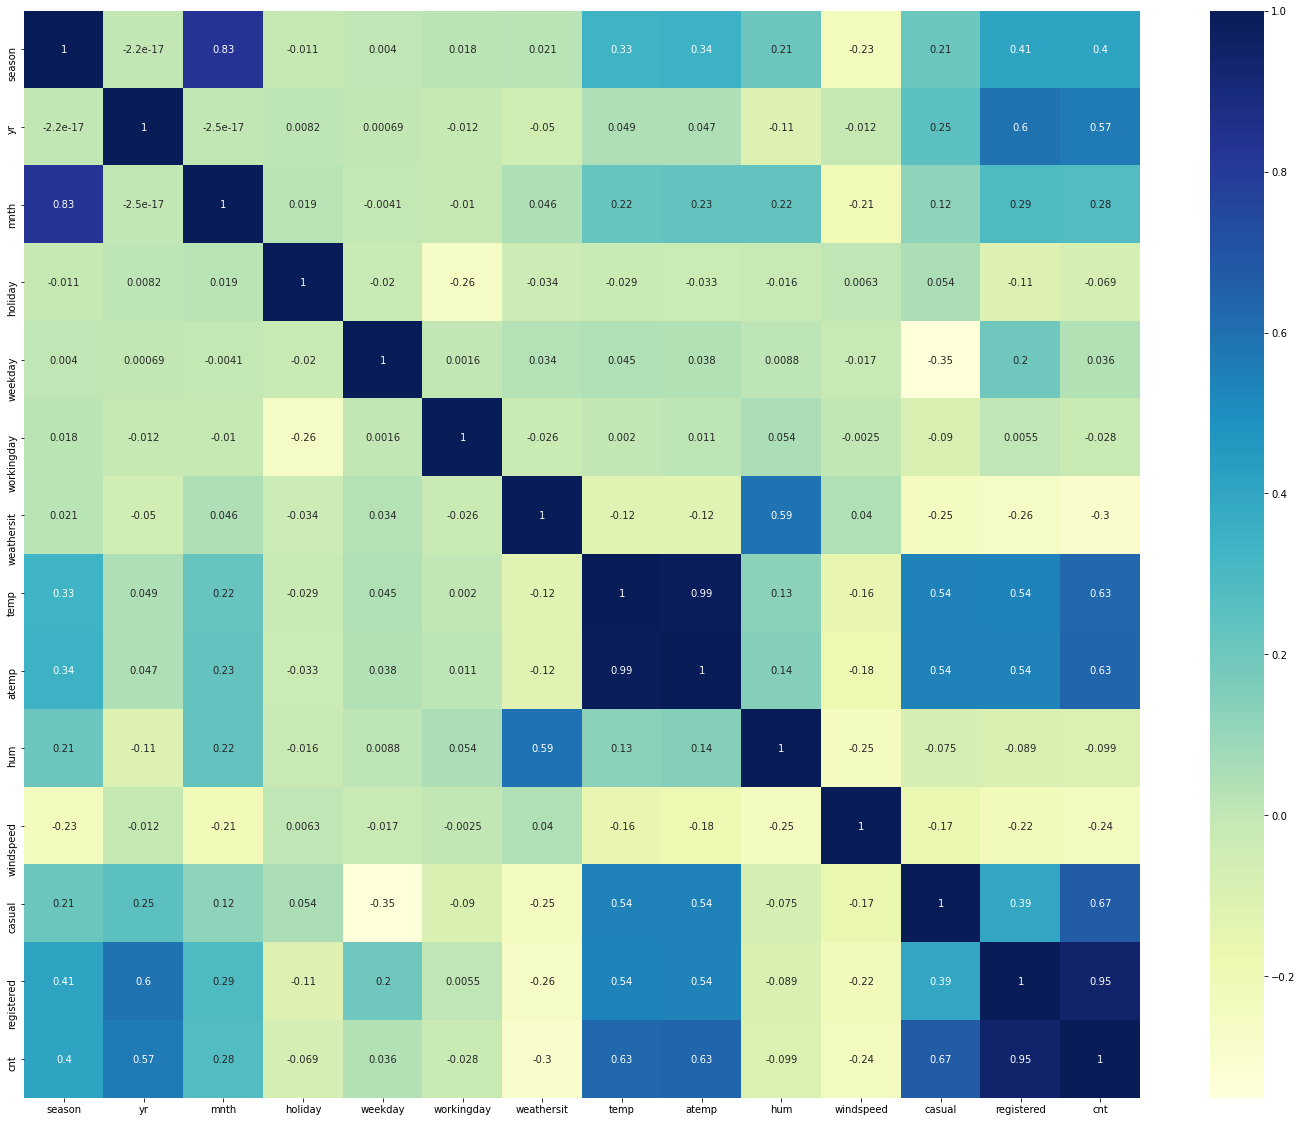

In [111]:
plt.figure(figsize = (25, 20))
sns.heatmap(inf.corr(), annot = True, cmap="YlGnBu")
plt.show()



# co-relation between the numeric, categorical, and binary variables

In [112]:
inf.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [113]:
inf1 = inf[inf['yr']==0]
inf2 = inf[inf['yr']==1]

registered customers' variable reflects the target variable with 95% accuracy

#### Strong Co-relation

1. atemp and temp are two variables that have high co-relation with the target variable 
2. Weather variable and Humidity have a high co-relation
3. month, season, atemp, temp, and hum are interdependent variables
4. This group shows a high co-relation with each other
4. on weekdays registered customers are more active

Binary Variables agains The Target Variable

-cat
1.season,
3.mnth,
7.weathersit,
-bool
4.holiday,
5.weekday,
6.workingday,
2.yr,
-num
8.temp,
9.atemp,
10.hum,
11.windspeed,
-target
12.casual,
13.registered,
14.cnt

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

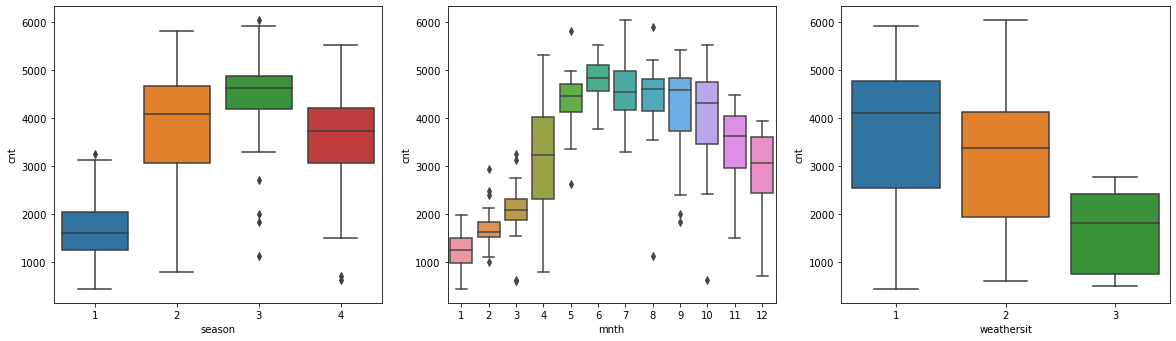

In [114]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = inf1)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = inf1)
plt.subplot(2,3,3)
sns.boxplot('weathersit', y = 'cnt', data = inf1)


<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

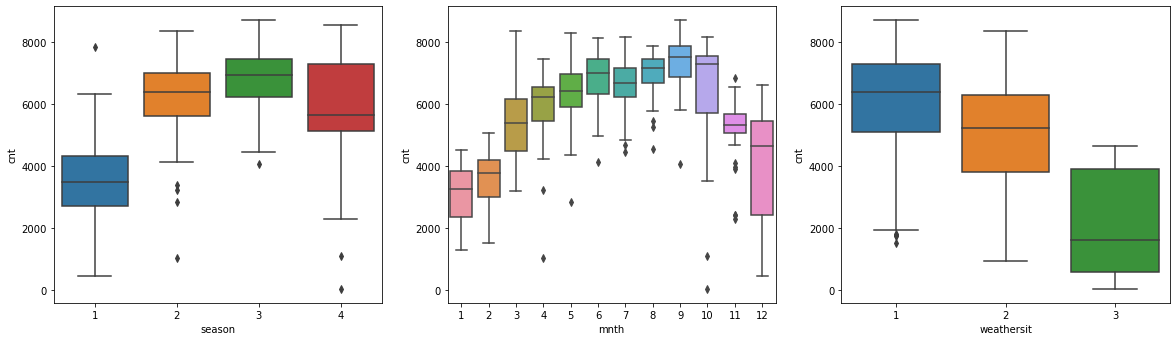

In [116]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = inf2)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = inf2)
plt.subplot(2,3,3)
sns.boxplot('weathersit', y = 'cnt', data = inf2)

Categorical Variables against Target Variables

In [117]:
status = pd.get_dummies(inf['season'], drop_first = True)
status.columns = ['s2','s3','s4']                    # Dummy columns for Season

In [118]:
inf = pd.concat([inf,status], axis = 1)
inf.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,s2,s3,s4
instant,,,,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,0
2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,0
3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,0
4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,0
5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,0


In [119]:
#statusx = pd.get_dummies(inf['mnth'], drop_first = True)
#statusx.columns = ['m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']
#inf = pd.concat([inf,statusx], axis =1)
#inf.head()

In [120]:
statusy = pd.get_dummies(inf['weathersit'])
statusy.columns = ['misty','ltrain', 'hvrain']
statusy






# Since in the data dictionary there 4 Levels to this variable
# And, in the there are only 3 levels
# Assuming the dummies have been created beforehand

,misty,ltrain,hvrain
instant,,,
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
...,...,...,...
726,0,1,0
727,0,1,0
728,0,1,0


In [121]:
inf = pd.concat([inf,statusy], axis = 1)

In [122]:
inf = inf.drop(['season', 'weathersit'], axis = 1)

In [123]:
def getdate(x):
    date = x.split('-')
    return date[0]

In [124]:
inf['day'] = inf['dteday'].apply(getdate)

In [125]:
inf['day'] = inf['day'].astype('int64')

In [126]:
def getweek(x):
    if (x>=1)&(x<=7):
        return 1
    elif (x>7)&(x<=14):
        return 2
    elif (x>14)&(x<=21):
        return 3
    else:
        return 4                   # to get on which week the count was made

In [127]:
inf['week'] = inf['day'].apply(getweek)         # it is a 4 level categorical variable

In [128]:
inf.week.value_counts()

4    226
3    168
2    168
1    168
Name: week, dtype: int64

In [129]:
statusz = pd.get_dummies(inf['week'], drop_first = True )
statusz.columns = ['w2','w3','w4']
statusz.shape                   # creating the dummies 

(730, 3)

In [130]:
inf = pd.concat([inf,statusz], axis = 1)

In [131]:
inf.shape

(730, 24)

In [132]:
inf = inf.drop(['week'], axis = 1)
inf.columns                      # dropping 'week' variable

Index(['dteday', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 's2', 's3',
       's4', 'misty', 'ltrain', 'hvrain', 'day', 'w2', 'w3', 'w4'],
      dtype='object')

In [133]:
inf.shape

(730, 23)

In [134]:
statusx = pd.get_dummies(inf['mnth'], drop_first = True)
statusx.columns = ['m2','m3','m4','m5','m6','m7','m8','m9','m10','m11','m12']
inf = pd.concat([inf,statusx], axis = 1)
inf = inf.drop(['mnth'], axis = 1)
inf = inf.drop(['dteday'], axis = 1)
inf.head()





# 'mnth' is treated as a class 12 categorical variables 
# and subjected to the same treatment

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,0,0,0
4,0,0,4,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,0,0,0,0,0
5,0,0,5,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [135]:
inf.day.describe()

count    730.000000
mean      15.720548
std        8.802278
min        1.000000
25%        8.000000
50%       16.000000
75%       23.000000
max       31.000000
Name: day, dtype: float64

In [136]:
numvars = ['temp','atemp','hum','windspeed','cnt','registered','casual']      # list of numeric variables

In [137]:
np.random.seed(0)
df_train, df_test = train_test_split(inf, train_size = 0.7, test_size = 0.3, random_state = 100)




# the dataset is split into 'train/test' data
 # df_train, df_test

In [138]:
scaler = MinMaxScaler()




# importing the MinMaxScaler 
# to scale the values of the train dataframe into a certain range

In [139]:
df_train[numvars] = scaler.fit_transform(df_train[numvars])




# transforming all the numeric variable between 0 and 1
# minimum values having value 0 and maximum value 1
# the range lies between 0 and 1

In [140]:
df_train[numvars].describe()




# the values have been scaled
# binary variables have been left intact to maintain the readability
# of the model

,temp,atemp,hum,windspeed,cnt,registered,casual
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.523944,0.254661
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.228175,0.206011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.353487,0.094179
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.525123,0.212740
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.696073,0.327415
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [141]:
df_train.shape

(510, 32)

In [142]:
y_train = df_train[['cnt','registered','casual']]
y1 = df_train['cnt']
y2 = df_train['registered']
y3 = df_train['casual']
df_train.pop('cnt')
df_train.pop('registered')
df_train.pop('casual')
X_train = df_train




# there are 3 target variables, 
# registered and total customers are analogous 
# model will be modified w.r.t. target 
# the final model'll be tested with other two 

In [143]:
y_train.describe()

,cnt,registered,casual
count,510.000000,510.000000,510.000000
mean,0.513620,0.523944,0.254661
std,0.224593,0.228175,0.206011
min,0.000000,0.000000,0.000000
25%,0.356420,0.353487,0.094179
50%,0.518638,0.525123,0.212740
75%,0.684710,0.696073,0.327415
max,1.000000,1.000000,1.000000


In [144]:
X_train.shape

(510, 29)

In [145]:
lm = LinearRegression()
lm.fit(X_train, y1)

rfe = RFE(lm, 15)             # running RFE, support for 15 
rfe = rfe.fit(X_train, y1)

In [146]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', False, 14),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('s2', True, 1),
 ('s3', True, 1),
 ('s4', True, 1),
 ('misty', True, 1),
 ('ltrain', True, 1),
 ('hvrain', True, 1),
 ('day', False, 15),
 ('w2', False, 9),
 ('w3', False, 6),
 ('w4', False, 13),
 ('m2', False, 7),
 ('m3', True, 1),
 ('m4', False, 3),
 ('m5', False, 2),
 ('m6', False, 4),
 ('m7', False, 10),
 ('m8', True, 1),
 ('m9', True, 1),
 ('m10', True, 1),
 ('m11', False, 11),
 ('m12', False, 12)]

In [147]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 's2', 's3', 's4', 'misty',
       'ltrain', 'hvrain', 'm3', 'm8', 'm9', 'm10'],
      dtype='object')

In [148]:
X_train.columns[~rfe.support_]

Index(['weekday', 'workingday', 'atemp', 'day', 'w2', 'w3', 'w4', 'm2', 'm4',
       'm5', 'm6', 'm7', 'm11', 'm12'],
      dtype='object')

In [149]:
X_train_rfe = X_train[col]

# this df has the modified X_train df 
# after RFE analysis

In [150]:
X_train_rfe.shape

(510, 15)

In [151]:
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y1,X_train_rfe_sm).fit()

In [152]:
y_train_pred01 = lr.predict(X_train_rfe_sm)

In [153]:
y_train_pred01.shape

(510,)

In [154]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          9.02e-190
Time:                        10:12:40   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0984      0.024      4.056      0.0

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

# VIF score for these variables

,Features,VIF
8,misty,29.39
9,ltrain,22.35
6,s3,6.29
2,temp,3.72
10,hvrain,3.44
5,s2,2.65
7,s4,2.34
3,hum,1.91
12,m8,1.68
14,m10,1.52


In [156]:
adjX = X_train_rfe.drop(['misty', 's3'], axis = 1)



# s3 has high p value
# misty and ltrain are corelated

In [157]:
adjX_sm = sm.add_constant(adjX)
lr_1 = sm.OLS(y1, adjX_sm).fit()

In [158]:
y_train_pred0 = lr_1.predict(adjX_sm)

In [159]:
y_train_pred0.shape

(510,)

In [160]:
print(lr_1.summary())


# m3 has high p-value

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          2.26e-190
Time:                        10:12:40   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2324      0.027      8.529      0.0

In [161]:
vif = pd.DataFrame()
vif['Features'] = adjX.columns
vif['VIF'] = [variance_inflation_factor(adjX.values, i) for i in range(adjX.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,14.75
2,temp,10.01
4,windspeed,3.69
6,s4,2.34
7,ltrain,2.14
0,yr,2.02
5,s2,1.83
10,m8,1.61
12,m10,1.61
11,m9,1.34


In [162]:
X2 = adjX.drop(['m3','hum'], axis = 1)   # hum and temp are corelated, m3 has hig p-value
X2_sm = sm.add_constant(X2)              # the model is tested again
lr_2 = sm.OLS(y1,X2_sm).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.1
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          3.21e-187
Time:                        10:12:40   Log-Likelihood:                 498.87
No. Observations:                 510   AIC:                            -973.7
Df Residuals:                     498   BIC:                            -922.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1355      0.017      8.079      0.0

In [163]:
y_train_pred = lr_2.predict(X2_sm)

In [164]:
y_train_pred.shape

(510,)

In [165]:
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.11
3,windspeed,3.11
0,yr,2.00
5,s4,1.95
4,s2,1.82
10,m10,1.60
8,m8,1.59
6,ltrain,1.49
9,m9,1.34
7,hvrain,1.09


In [166]:
X3 = X2.drop(['m10','m8'], axis = 1)     # assuming the model will not change much
X3_sm = sm.add_constant(X3)
lr_3 = sm.OLS(y1, X3_sm).fit()
print(lr_3.summary())



                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sun, 11 Jul 2021   Prob (F-statistic):          1.37e-186
Time:                        10:12:41   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.017      7.541      0.0

In [167]:
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.05
0,yr,2.00
4,s2,1.56
6,ltrain,1.48
5,s4,1.38
8,m9,1.20
7,hvrain,1.08
1,holiday,1.03


This is the final model

In [168]:
ypred = lr_3.predict(X3_sm)                           # using the model on test data

In [169]:
ypred.shape

(510,)

Text(0.5, 0, 'Errors')

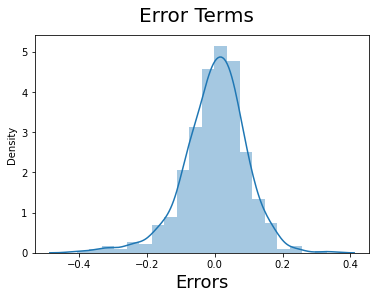

In [170]:
fig = plt.figure()
sns.distplot((y1 - ypred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # The distribution of error terms is normal
plt.xlabel('Errors', fontsize = 18)     

Text(0.5, 0, 'Errors')

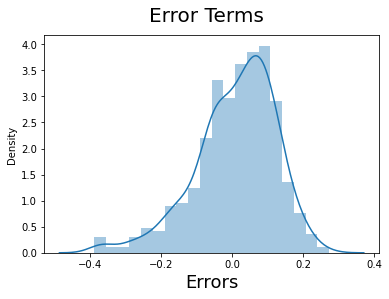

In [171]:
fig = plt.figure()
sns.distplot((y2 - ypred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # The distribution of error terms is normal
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

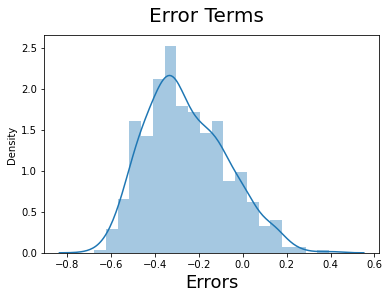

In [172]:
fig = plt.figure()
sns.distplot((y3 - ypred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # The distribution of error terms is normal
plt.xlabel('Errors', fontsize = 18)

 We see for registered customers centre of the distribution of error terms is towards the right, and for casual customers it is centred towards the left. Total customers have their error terms distributed roughly centred around 
 the Zero. Or, both trends can be explained from the Target trend.

In [173]:
df_test[numvars] = scaler.transform(df_test[numvars])

# preparing input data for model testing

In [174]:
y_train = df_test[['cnt','registered','casual']]
y1_test = df_test['cnt']
y2_test = df_test['registered']
y3_test = df_test['casual']

# target is divided following previous method

In [175]:
df_test.pop('cnt')
df_test.pop('registered')
df_test.pop('casual')
X_test = df_test

In [176]:
X_test_new = X_test[X3.columns]

X_test_new = sm.add_constant(X_test_new)

# this is the unseen test data

In [177]:
y_test_pred = lr_3.predict(X_test_new)

# predicted target variables

In [178]:
np.sqrt(mean_squared_error(y1_test, y_test_pred))

0.09895583956046229

In [179]:
r_squared = r2_score(y1_test, y_test_pred)
r_squared

0.7938290016640651

In [180]:
0.828-0.794 # the model shows only 3.4% decreased performance on unseen data

0.03399999999999992

Text(0.5, 0, 'Errors')

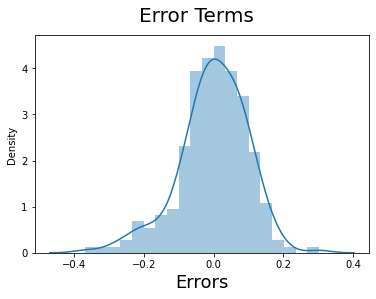

In [181]:
fig = plt.figure()
sns.distplot((y1_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # The distribution of error terms is normal
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

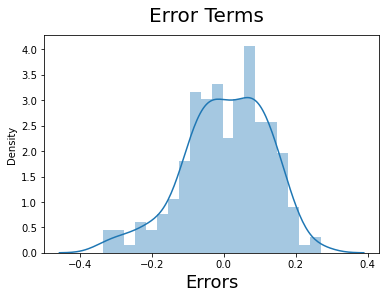

In [182]:
fig = plt.figure()
sns.distplot((y2_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # The distribution of error terms is normal
plt.xlabel('Errors', fontsize = 18)

Text(0.5, 0, 'Errors')

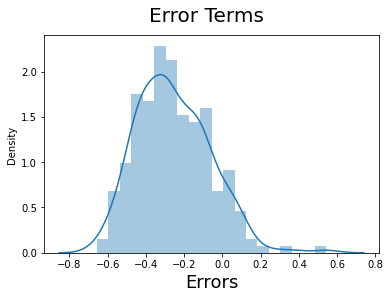

In [183]:
fig = plt.figure()
sns.distplot((y3_test - y_test_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # The distribution of error terms is normal
plt.xlabel('Errors', fontsize = 18)